In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Activation, Dense, Flatten, BatchNormalization, Dropout, Conv2D, MaxPool2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import plot_confusion_matrix, confusion_matrix 
from sklearn.metrics import accuracy_score
from sklearn.utils import shuffle
import itertools
import os
import shutil
import random
import glob
import matplotlib.pyplot as plt 
import warnings
warnings.simplefilter(action='ignore',category=FutureWarning)
%matplotlib inline

In [2]:
physical_devices = tf.config.experimental.list_physical_devices('GPU')
print("Num GPUs Available: ", len(physical_devices))
tf.config.experimental.set_memory_growth(physical_devices[0], True)

Num GPUs Available:  1


In [3]:
os.chdir('data/recurrence-plot')
if os.path.isdir('train/chaotic') is False:
    os.makedirs('train/chaotic')
    os.makedirs('train/periodic')
    os.makedirs('train/trend')
    os.makedirs('valid/chaotic')
    os.makedirs('valid/periodic')
    os.makedirs('valid/trend')
    os.makedirs('test/chaotic')
    os.makedirs('test/periodic')
    os.makedirs('test/trend')
    
    for c in random.sample(glob.glob('chaotic*'), 850):
        shutil.move(c, 'train/chaotic')
    for c in random.sample(glob.glob('periodic*'), 850):
        shutil.move(c, 'train/periodic')
    for c in random.sample(glob.glob('trend*'), 850):
        shutil.move(c, 'train/trend')
    for c in random.sample(glob.glob('chaotic*'), 100):
        shutil.move(c, 'valid/chaotic')
    for c in random.sample(glob.glob('periodic*'), 100):
        shutil.move(c, 'valid/periodic')
    for c in random.sample(glob.glob('trend*'), 100):
        shutil.move(c, 'valid/trend')
    for c in random.sample(glob.glob('chaotic*'), 50):
        shutil.move(c, 'test/chaotic')
    for c in random.sample(glob.glob('periodic*'), 50):
        shutil.move(c, 'test/periodic')
    for c in random.sample(glob.glob('trend*'), 50):
        shutil.move(c, 'test/trend')
        
os.chdir('../../')

In [5]:
train_path = 'data/recurrence-plot/train'
valid_path = 'data/recurrence-plot/valid'
test_path = 'data/recurrence-plot/test'

In [148]:
train_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input) \
.flow_from_directory(directory=train_path, target_size=(224,224), classes=['periodic', 'trend', 'chaotic'], batch_size=10)                
valid_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input) \
.flow_from_directory(directory=valid_path, target_size=(224,224), classes=['periodic', 'trend', 'chaotic'], batch_size=10)
test_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input) \
.flow_from_directory(directory=test_path, target_size=(224,224), classes=['periodic', 'trend', 'chaotic'], batch_size=10, shuffle=False)

Found 2550 images belonging to 3 classes.
Found 300 images belonging to 3 classes.
Found 150 images belonging to 3 classes.


In [149]:
print(test_batches.class_indices)

{'periodic': 0, 'trend': 1, 'chaotic': 2}


In [42]:
model = Sequential([
    Conv2D(filters=64, kernel_size=(3,3), activation='relu', padding='same', input_shape=(224,224,3)),
    Conv2D(filters=64, kernel_size=(3,3), activation='relu', padding='same'),
    MaxPool2D(pool_size=(2,2), strides=2),
    Dropout(0.25),
    Conv2D(filters=128, kernel_size=(3,3), activation='relu', padding='same'),
    Conv2D(filters=128, kernel_size=(3,3), activation='relu', padding='same'),
    MaxPool2D(pool_size=(2,2), strides=2),
    Dropout(0.25),
    Conv2D(filters=256, kernel_size=(3,3), activation='relu', padding='same'),
    Conv2D(filters=256, kernel_size=(3,3), activation='relu', padding='same'),
    MaxPool2D(pool_size=(2,2), strides=2),
    Dropout(0.25),
    Conv2D(filters=512, kernel_size=(3,3), activation='relu', padding='same'),
    Conv2D(filters=512, kernel_size=(3,3), activation='relu', padding='same'),
    MaxPool2D(pool_size=(2,2), strides=2),
    Dropout(0.25),
    Flatten(),
    Dense(units=3, activation='softmax')
])

In [43]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_14 (Conv2D)           (None, 224, 224, 64)      1792      
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 224, 224, 64)      36928     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 112, 112, 64)      0         
_________________________________________________________________
dropout_7 (Dropout)          (None, 112, 112, 64)      0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 112, 112, 128)     73856     
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 112, 112, 128)     147584    
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 56, 56, 128)      

In [44]:
model.compile(optimizer=Adam(learning_rate=0.001), 
              loss='categorical_crossentropy', metrics=['accuracy'])

In [45]:
model.fit(x=train_batches, validation_data=valid_batches, epochs=10, verbose=2)

Epoch 1/10
255/255 - 24s - loss: 7.4704 - accuracy: 0.7973 - val_loss: 8.4446e-04 - val_accuracy: 1.0000
Epoch 2/10
255/255 - 23s - loss: 0.1034 - accuracy: 0.9667 - val_loss: 0.0157 - val_accuracy: 0.9933
Epoch 3/10
255/255 - 23s - loss: 0.0357 - accuracy: 0.9918 - val_loss: 6.2133e-05 - val_accuracy: 1.0000
Epoch 4/10
255/255 - 23s - loss: 3.8896e-04 - accuracy: 0.9996 - val_loss: 2.5552e-05 - val_accuracy: 1.0000
Epoch 5/10
255/255 - 23s - loss: 5.6732e-05 - accuracy: 1.0000 - val_loss: 1.6588e-05 - val_accuracy: 1.0000
Epoch 6/10
255/255 - 23s - loss: 1.4010e-05 - accuracy: 1.0000 - val_loss: 7.8537e-06 - val_accuracy: 1.0000
Epoch 7/10
255/255 - 23s - loss: 8.8292e-06 - accuracy: 1.0000 - val_loss: 4.5072e-06 - val_accuracy: 1.0000
Epoch 8/10
255/255 - 23s - loss: 5.9272e-06 - accuracy: 1.0000 - val_loss: 2.7291e-06 - val_accuracy: 1.0000
Epoch 9/10
255/255 - 23s - loss: 2.7526e-06 - accuracy: 1.0000 - val_loss: 1.7468e-06 - val_accuracy: 1.0000
Epoch 10/10
255/255 - 23s - loss: 2

# Predict

In [174]:
predictions = model.predict(x=test_batches, verbose=0)

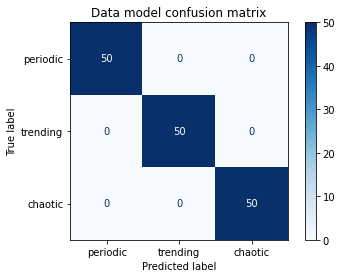

In [175]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC

class_names=['periodic','trending','chaotic']
title = "Data model confusion matrix"
classifier = svm.SVC(kernel='linear', C=1).fit(predictions, test_batches.classes)
np.set_printoptions(precision=2)

titles_options = [("Normallaized confusion matrix", "true")]

disp=plot_confusion_matrix(classifier, predictions, test_batches.classes,
                          display_labels=class_names,
                          cmap=plt.cm.Blues)

disp.ax_.set_title(title)

plt.show()

In [22]:
if os.path.isfile('models/recurrence_plot_model.h5') is False:
    model.save('models/recurrence_plot_model.h5')

In [11]:
model = load_model('models/recurrence_plot_model.h5')

In [55]:
model.summary()

Model: "sequential_16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_140 (Conv2D)          (None, 224, 224, 64)      1792      
_________________________________________________________________
conv2d_141 (Conv2D)          (None, 224, 224, 64)      36928     
_________________________________________________________________
max_pooling2d_59 (MaxPooling (None, 112, 112, 64)      0         
_________________________________________________________________
dropout_16 (Dropout)         (None, 112, 112, 64)      0         
_________________________________________________________________
conv2d_142 (Conv2D)          (None, 112, 112, 128)     73856     
_________________________________________________________________
conv2d_143 (Conv2D)          (None, 112, 112, 128)     147584    
_________________________________________________________________
max_pooling2d_60 (MaxPooling (None, 56, 56, 128)     